In [313]:
import pandas as pd

In [314]:
import numpy as np

In [315]:
import matplotlib.pyplot as plt

In [316]:
import seaborn as sns

In [317]:
import nltk

In [318]:
import tensorflow as tf

In [319]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [320]:
import string

In [321]:
df= pd.read_excel("bereinigt_daten.xlsx")

In [322]:
df.head(10)

,Unnamed: 0,text,sentiment,score,Wortzählung,Sprache
0,0,"summary of ""yesterdays"" webcast featuring aap...",neutral,0.000000,15,en
1,1,itv will boost apple aapl apple.,neutral,0.000000,6,en
2,2,iphone users are more intelligent than samsung...,positiv,0.650000,14,en
3,3,2013 wrap-up and trading set review - part iii...,neutral,0.000000,21,en
4,4,apple screwed up big time amzn aapl.,neutral,0.000000,7,en
5,5,aapl - wall st . kicks off new year on lower ...,positiv,0.136364,16,en
6,6,"""heres"" how apple could be making a huge push ...",positiv,0.400000,13,en
7,7,our top 3 trade ideas for 2014 and two 1000 f...,positiv,0.400000,22,en
8,8,aapl having breathing difficulties.,neutral,0.000000,5,en
9,9,"emylers : ""cheekys"" board ! : aapl up to date...",negativ,-0.125000,16,en


In [323]:
# Stimmung


In [324]:
Stimmung = df["sentiment"].value_counts()

In [325]:
Stimmung

sentiment
positiv    28252
negativ    23760
neutral    19668
Name: count, dtype: int64

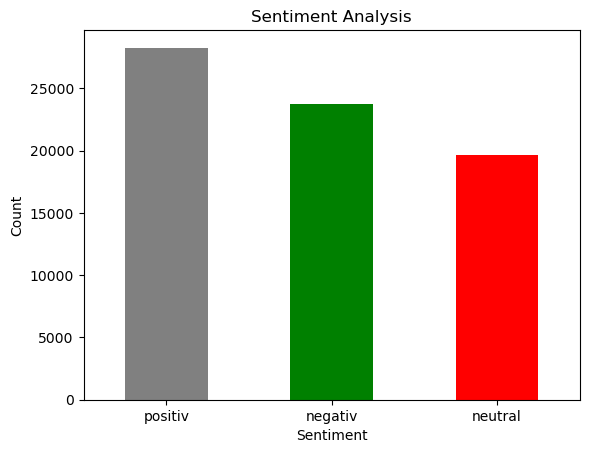

In [326]:
sentiment_counts = df['sentiment'].value_counts()

# Balkendiagramm erstellen
sentiment_counts.plot(kind='bar', color=['gray', 'g', 'r'])
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [327]:
#df.groupby(["Firmen", "sentiment"]).size().unstack().plot(kind="bar",color=['red', 'gray', 'g'], stacked=True)

<Axes: xlabel='tweet_length'>

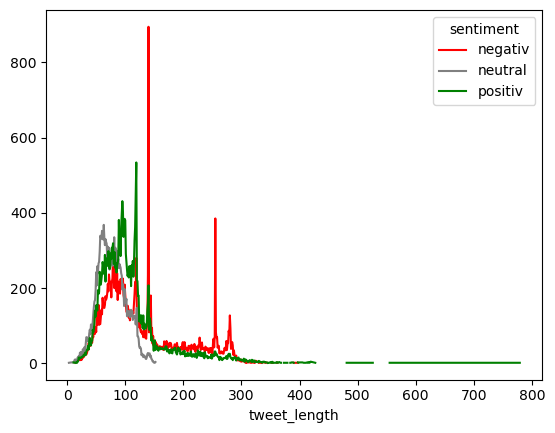

In [328]:
df["tweet_length"]= df["text"].apply(len)
df.groupby(["tweet_length","sentiment"]).size().unstack().plot(kind="line",color=['red', 'gray', 'g'], stacked=False)

In [329]:
text_sentiment_at_20000 = df.loc[20000, ["text", "sentiment"]]

In [330]:
text_sentiment_at_20000

text         wall street breakfast : wti  brent crude reach...
sentiment                                              negativ
Name: 20000, dtype: object

In [331]:
df.iloc[20000]

Unnamed: 0                                                  24270
text            wall street breakfast : wti  brent crude reach...
sentiment                                                 negativ
score                                                        -0.7
Wortzählung                                                    19
Sprache                                                        en
tweet_length                                                  101
Name: 20000, dtype: object

In [332]:
text_len= []
for text in df["text"]:
    tweet_len = len(text.split())
    text_len.append(tweet_len)

In [333]:
df["text_len"]=text_len

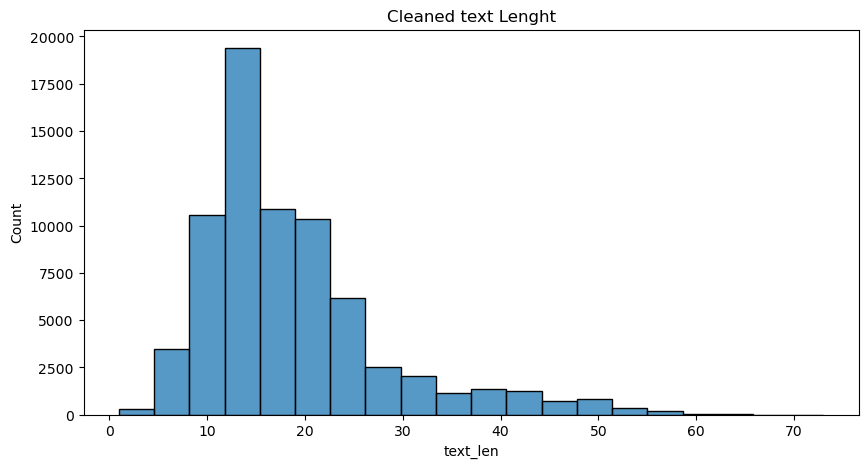

In [334]:
plt.figure(figsize=(10, 5))
sns.histplot(x="text_len", data=df, bins=20)
plt.title("Cleaned text Lenght")
plt.show()

In [335]:
df

,Unnamed: 0,text,sentiment,score,Wortzählung,Sprache,tweet_length,text_len
0,0,"summary of ""yesterdays"" webcast featuring aap...",neutral,0.000000,15,en,112,15
1,1,itv will boost apple aapl apple.,neutral,0.000000,6,en,34,6
2,2,iphone users are more intelligent than samsung...,positiv,0.650000,14,en,89,14
3,3,2013 wrap-up and trading set review - part iii...,neutral,0.000000,21,en,112,21
4,4,apple screwed up big time amzn aapl.,neutral,0.000000,7,en,39,7
...,...,...,...,...,...,...,...,...
71675,18121,Federal Realty Investment Trust $F Short Inter...,negativ,-0.077778,13,en,78,12
71676,18122,Microchip Technology Inc. $MCHP Short Interest...,negativ,-0.077778,12,en,75,11
71677,18123,MicroStrategy Incorporated $MSTR Short Interes...,negativ,-0.077778,11,en,76,10
71678,18124,Monster Beverage Corp $MNST Short Interest Dow...,negativ,-0.077778,12,en,71,11


In [336]:
df

,Unnamed: 0,text,sentiment,score,Wortzählung,Sprache,tweet_length,text_len
0,0,"summary of ""yesterdays"" webcast featuring aap...",neutral,0.000000,15,en,112,15
1,1,itv will boost apple aapl apple.,neutral,0.000000,6,en,34,6
2,2,iphone users are more intelligent than samsung...,positiv,0.650000,14,en,89,14
3,3,2013 wrap-up and trading set review - part iii...,neutral,0.000000,21,en,112,21
4,4,apple screwed up big time amzn aapl.,neutral,0.000000,7,en,39,7
...,...,...,...,...,...,...,...,...
71675,18121,Federal Realty Investment Trust $F Short Inter...,negativ,-0.077778,13,en,78,12
71676,18122,Microchip Technology Inc. $MCHP Short Interest...,negativ,-0.077778,12,en,75,11
71677,18123,MicroStrategy Incorporated $MSTR Short Interes...,negativ,-0.077778,11,en,76,10
71678,18124,Monster Beverage Corp $MNST Short Interest Dow...,negativ,-0.077778,12,en,71,11


In [337]:
len(df["text"])

71680

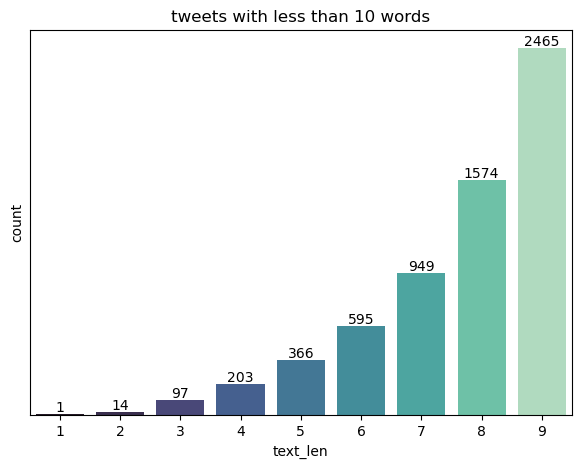

In [338]:
plt.figure(figsize=(7, 5))
ax= sns.countplot(x="text_len", data= df[df["text_len"]<10], palette="mako")
plt.title("tweets with less than 10 words")
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel("count")
plt.show()

In [339]:
df.head(50)

,Unnamed: 0,text,sentiment,score,Wortzählung,Sprache,tweet_length,text_len
0,0,"summary of ""yesterdays"" webcast featuring aap...",neutral,0.000000,15,en,112,15
1,1,itv will boost apple aapl apple.,neutral,0.000000,6,en,34,6
2,2,iphone users are more intelligent than samsung...,positiv,0.650000,14,en,89,14
3,3,2013 wrap-up and trading set review - part iii...,neutral,0.000000,21,en,112,21
4,4,apple screwed up big time amzn aapl.,neutral,0.000000,7,en,39,7
5,5,aapl - wall st . kicks off new year on lower ...,positiv,0.136364,16,en,80,16
6,6,"""heres"" how apple could be making a huge push ...",positiv,0.400000,13,en,73,13
7,7,our top 3 trade ideas for 2014 and two 1000 f...,positiv,0.400000,22,en,99,22
8,8,aapl having breathing difficulties.,neutral,0.000000,5,en,37,4
9,9,"emylers : ""cheekys"" board ! : aapl up to date...",negativ,-0.125000,16,en,82,16


In [340]:
df[df["text_len"]==2]["text"]

9087           aapl low.
14045       amzn trying.
15582     almost forgot 
15618       amzn please.
18434       h-p   rally 
24280     intc rofl-ing.
24592             intc .
26266     twitter lower 
26320         fb bounce.
33943             orcl .
40364       @Tesla Great
40365        @Tesla Cool
56037      Worth reading
56640       $ADBE strong
Name: text, dtype: object

In [341]:
df[df["text_len"]==4]["text"]

8                  aapl having breathing difficulties.
123                            aapl right on schedule 
162                        aapl  twtr flighttosafety .
477                        stocks open quietly higher 
618                               active calls @ cboe 
1406                                 aapl short term .
2514                   thinking android is consistent 
3036                      trading  spy contracts live 
3171                         high uncertainty :  aapl.
3892                               nice move on  aapl.
4128                              aapl lottos now itm.
4230                               active puts @ cboe 
4458                             aapl bring the noise.
4665                               active puts @ cboe 
4820                        gotta be protection  aapl.
5229                           aapl saving the market.
5308                              active calls @ cboe 
5343                                   aapl shorts . .
5985      

In [342]:
df= df[df["text_len"]>4]

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71365 entries, 0 to 71679
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    71365 non-null  int64  
 1   text          71365 non-null  object 
 2   sentiment     71365 non-null  object 
 3   score         71365 non-null  float64
 4   Wortzählung   71365 non-null  int64  
 5   Sprache       71365 non-null  object 
 6   tweet_length  71365 non-null  int64  
 7   text_len      71365 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 4.9+ MB


In [344]:
word_count_distribution = df['Wortzählung'].value_counts().reset_index()

# Benenne die Spalten um
word_count_distribution.columns = ['Anzahl der Wörter', 'Anzahl der Tweets']

# Sortiere den DataFrame nach der Anzahl der Wörter
word_count_distribution = word_count_distribution.sort_values(by='Anzahl der Wörter')

# Zeige das Ergebnis
print(word_count_distribution)
word_count_distribution.to_excel('word_count_distribution.xlsx', index=False)

    Anzahl der Wörter  Anzahl der Tweets
41                  5                259
26                  6                521
21                  7                793
17                  8               1231
14                  9               2146
8                  10               3420
5                  11               3900
1                  12               4931
0                  13               5272
2                  14               4833
3                  15               4142
4                  16               4034
6                  17               3836
7                  18               3472
9                  19               3090
10                 20               2882
11                 21               2511
12                 22               2278
13                 23               2160
15                 24               1787
16                 25               1489
18                 26               1206
19                 27               1105
20              

In [345]:
df

,Unnamed: 0,text,sentiment,score,Wortzählung,Sprache,tweet_length,text_len
0,0,"summary of ""yesterdays"" webcast featuring aap...",neutral,0.000000,15,en,112,15
1,1,itv will boost apple aapl apple.,neutral,0.000000,6,en,34,6
2,2,iphone users are more intelligent than samsung...,positiv,0.650000,14,en,89,14
3,3,2013 wrap-up and trading set review - part iii...,neutral,0.000000,21,en,112,21
4,4,apple screwed up big time amzn aapl.,neutral,0.000000,7,en,39,7
...,...,...,...,...,...,...,...,...
71675,18121,Federal Realty Investment Trust $F Short Inter...,negativ,-0.077778,13,en,78,12
71676,18122,Microchip Technology Inc. $MCHP Short Interest...,negativ,-0.077778,12,en,75,11
71677,18123,MicroStrategy Incorporated $MSTR Short Interes...,negativ,-0.077778,11,en,76,10
71678,18124,Monster Beverage Corp $MNST Short Interest Dow...,negativ,-0.077778,12,en,71,11


Wortwolke


In [346]:
#Eine Wortwolke ist eine visuelle Darstellung, die die Häufigkeit der Wörter in einem Text zeigt. 
#Größere Wörter repräsentieren häufiger vorkommende Wörter.

In [347]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

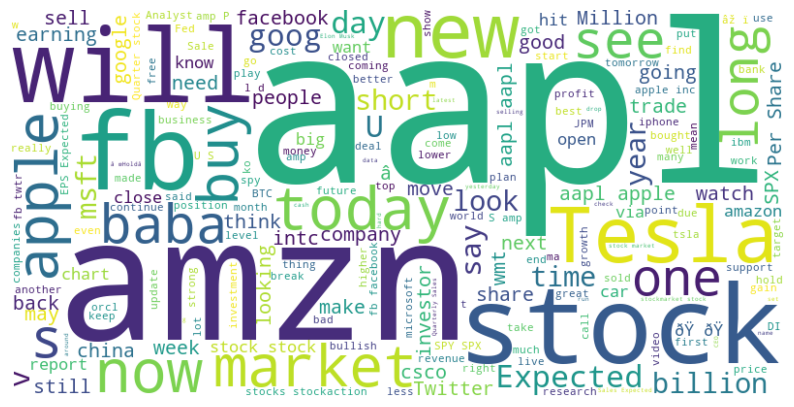

In [348]:
all_tweets_text = " ".join(tweet for tweet in df['text'])
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(all_tweets_text)
plt.figure(figsize=(10, 8), edgecolor = 'k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

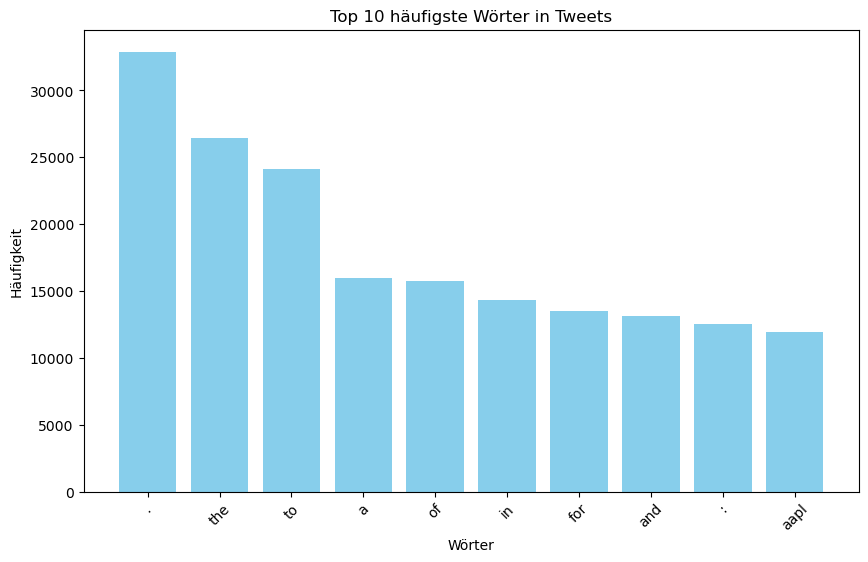

In [349]:
from collections import Counter
all_words = [word for tweet in df["text"] for word in tweet.split() ]
word_counts = Counter(all_words)
word_freq_df= pd.DataFrame(word_counts.items(), columns=["Wort", "Häufigkeit"])
word_freq_df= word_freq_df.sort_values(by="Häufigkeit", ascending=False)
N = 10
top_words_df = word_freq_df.head(N)

plt.figure(figsize=(10, 6 ))
plt.bar(top_words_df["Wort"], top_words_df["Häufigkeit"], color="skyblue")
plt.xlabel("Wörter")
plt.ylabel("Häufigkeit")
plt.xticks(rotation=45)
plt.title(f"Top {N} häufigste Wörter in Tweets")
plt.show()

In [350]:
top_words_df

,Wort,Häufigkeit
13,.,32895
90,the,26455
99,to,24101
71,a,15995
1,of,15745
89,in,14297
82,for,13521
27,and,13148
95,:,12494
5,aapl,11897


In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71365 entries, 0 to 71679
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    71365 non-null  int64  
 1   text          71365 non-null  object 
 2   sentiment     71365 non-null  object 
 3   score         71365 non-null  float64
 4   Wortzählung   71365 non-null  int64  
 5   Sprache       71365 non-null  object 
 6   tweet_length  71365 non-null  int64  
 7   text_len      71365 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 4.9+ MB


In [352]:
df.head()

,Unnamed: 0,text,sentiment,score,Wortzählung,Sprache,tweet_length,text_len
0,0,"summary of ""yesterdays"" webcast featuring aap...",neutral,0.00,15,en,112,15
1,1,itv will boost apple aapl apple.,neutral,0.00,6,en,34,6
2,2,iphone users are more intelligent than samsung...,positiv,0.65,14,en,89,14
3,3,2013 wrap-up and trading set review - part iii...,neutral,0.00,21,en,112,21
4,4,apple screwed up big time amzn aapl.,neutral,0.00,7,en,39,7


## lower

In [353]:
df["text"]= df["text"].str.lower()

C:\Users\ae81goji\AppData\Local\Temp\ipykernel_24832\4097916544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text"]= df["text"].str.lower()


## remove stop words, punctuation

In [354]:
#split add space before punctuation
df["text"]= df["text"].str.replace(r"."," .")
df["text"]= df["text"].str.replace(r","," ,")
df["text"]= df["text"].str.replace(r"?"," ?")
#df["text"]= df["text"].str.replace(r":"," :")

C:\Users\ae81goji\AppData\Local\Temp\ipykernel_24832\3984467788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text"]= df["text"].str.replace(r"."," .")
C:\Users\ae81goji\AppData\Local\Temp\ipykernel_24832\3984467788.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text"]= df["text"].str.replace(r","," ,")
C:\Users\ae81goji\AppData\Local\Temp\ipykernel_24832\3984467788.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [355]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ae81goji\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ae81goji\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## tokenization

In [356]:
stpwrds = nltk.corpus.stopwords.words('english')
pntn = string.punctuation

In [357]:
stpwrds

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [358]:
pntn

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [359]:
df["text"].iloc[45]

' aapl - boeing contract with machinists - details of agreement ->  stock stocks stockaction .'

In [360]:
def Entfernen_Stoppwörter_Satzzeichen (text):
    words= nltk.word_tokenize(text)
    filterd_words= [word for word in words if word not in stpwrds and word not in pntn ]
    return ' '.join(filterd_words)

In [361]:
df["text"]= df["text"].apply(Entfernen_Stoppwörter_Satzzeichen)

C:\Users\ae81goji\AppData\Local\Temp\ipykernel_24832\1054210690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text"]= df["text"].apply(Entfernen_Stoppwörter_Satzzeichen)


In [362]:
df["text"].iloc[45]

'aapl boeing contract machinists details agreement stock stocks stockaction'

## stemming

In [363]:
from nltk.stem.porter import *
stemmer = nltk.stem.PorterStemmer()

In [364]:
df["text"].iloc[0]

"summary `` yesterdays '' webcast featuring aapl wynn goog lgf tradereducation options hedgingstrategies"

In [365]:
df["text"]

0        summary `` yesterdays '' webcast featuring aap...
1                               itv boost apple aapl apple
2        iphone users intelligent samsung blackberry ht...
3        2013 wrap-up trading set review part iii aapl ...
4                         apple screwed big time amzn aapl
                               ...                        
71675    federal realty investment trust f short intere...
71676    microchip technology inc mchp short interest 2...
71677    microstrategy incorporated mstr short interest...
71678    monster beverage corp mnst short interest 20 ....
71679    tesla daily sp500 short term 660 760 next supp...
Name: text, Length: 71365, dtype: object

In [366]:
stemmer.stem(word=df['text'].iloc[0])

"summary `` yesterdays '' webcast featuring aapl wynn goog lgf tradereducation options hedgingstrategi"

In [367]:
stemmer.stem("interesting")

'interest'

In [368]:
def string_stemmer(text):
    words = nltk.word_tokenize(text)
    filtered_words = [stemmer.stem(word) for word in words]
    return ' '.join(filtered_words)

In [369]:
df["text"]= df["text"].apply(string_stemmer)

C:\Users\ae81goji\AppData\Local\Temp\ipykernel_24832\3309255266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text"]= df["text"].apply(string_stemmer)


## EDA

In [370]:
import plotly.graph_objects as go
import spacy
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

## normalize

In [371]:
nlp = spacy.load("en_core_web_sm")

def normalize(msg):
    doc = nlp(msg)
    res = []

    for token in doc:
        if(token.is_stop or token.is_punct or token.is_space):
            pass
        else:
            res.append(token.lemma_.lower())

    return res

In [372]:
#df["text_norm"] = df["text"].apply(normalize)
#df.head()

In [373]:
#df["text_norm"]

In [374]:
df

,Unnamed: 0,text,sentiment,score,Wortzählung,Sprache,tweet_length,text_len
0,0,summari `` yesterday `` webcast featur aapl wy...,neutral,0.000000,15,en,112,15
1,1,itv boost appl aapl appl,neutral,0.000000,6,en,34,6
2,2,iphon user intellig samsung blackberri htc own...,positiv,0.650000,14,en,89,14
3,3,2013 wrap-up trade set review part iii aapl ap...,neutral,0.000000,21,en,112,21
4,4,appl screw big time amzn aapl,neutral,0.000000,7,en,39,7
...,...,...,...,...,...,...,...,...
71675,18121,feder realti invest trust f short interest 21 ...,negativ,-0.077778,13,en,78,12
71676,18122,microchip technolog inc mchp short interest 20...,negativ,-0.077778,12,en,75,11
71677,18123,microstrategi incorpor mstr short interest 20 ...,negativ,-0.077778,11,en,76,10
71678,18124,monster beverag corp mnst short interest 20 .5...,negativ,-0.077778,12,en,71,11


In [375]:
#data_speicher= df.to_excel("dataset.xlsx")

## word cloud after normalization

In [376]:
pd.set_option('display.max_rows', 2000)

In [377]:
#words_collection = Counter([item for sublist in df['text_norm'] for item in sublist])
#freq_word_df = pd.DataFrame(words_collection.most_common(200))
#freq_word_df.columns = ['frequently_used_word','count']

#freq_word_df.style.background_gradient(cmap='PuBuGn', low=0, high=0, axis=0, subset=None)

In [378]:
#word_list = [item for sublist in df["text_norm"] for item in sublist]
#word_string = " ".join(word_list)

#wc_plot = WordCloud(  background_color='white',
                     # max_words=6000,
                      #width=1000,
                     # height=650
                     # ).generate(word_string)

#plt.figure(figsize=(20,10))
#plt.imshow(wc_plot)
#plt.axis('off')
#plt.show()

## Positiv

In [379]:
#df_positiv = df[df['sentiment']=="positiv"]
#words_collection = Counter([item for sublist in df_positiv['text_norm'] for item in sublist])
#freq_word_df = pd.DataFrame(words_collection.most_common(80))
#freq_word_df.columns = ['frequently_used_word','count']

#freq_word_df.style.background_gradient(cmap='PuBuGn', low=0, high=0, axis=0, subset=None)

In [380]:
#word_list = [item for sublist in df_positiv['text_norm'] for item in sublist]
#word_string = " ".join(word_list)

#wc_plot = WordCloud(  background_color='white',
                     # max_words=6000,
                     # width=1000,
                     # height=650
                     # ).generate(word_string)

#plt.figure(figsize=(20,10))
#plt.imshow(wc_plot)
#plt.axis('off')
#plt.show()

## Neutral

In [381]:
#df_neutral= df[df["sentiment"]=="neutral"]
#words_collection = Counter([item for sublist in df_neutral["text_norm"] for item in sublist])
#freq_words_df = pd.DataFrame(words_collection.most_common(80))
#freq_words_df.columns = ["frequently_used_word", "count"]
#freq_word_df.style.background_gradient(cmap="PuBuGn", low=0, high=0, axis= 0, subset=None)

In [382]:
#word_list = [item for sublist in df_neutral['text_norm'] for item in sublist]
#word_string = " ".join(word_list)

#wc_plot = WordCloud(  background_color='white',
                      #max_words=6000,
                      #width=1000,
                     # height=650
                     # ).generate(word_string)

#plt.figure(figsize=(20,10))
#plt.imshow(wc_plot)
#plt.axis('off')
#plt.show()

## Negativ

In [383]:
df

,Unnamed: 0,text,sentiment,score,Wortzählung,Sprache,tweet_length,text_len
0,0,summari `` yesterday `` webcast featur aapl wy...,neutral,0.000000,15,en,112,15
1,1,itv boost appl aapl appl,neutral,0.000000,6,en,34,6
2,2,iphon user intellig samsung blackberri htc own...,positiv,0.650000,14,en,89,14
3,3,2013 wrap-up trade set review part iii aapl ap...,neutral,0.000000,21,en,112,21
4,4,appl screw big time amzn aapl,neutral,0.000000,7,en,39,7
...,...,...,...,...,...,...,...,...
71675,18121,feder realti invest trust f short interest 21 ...,negativ,-0.077778,13,en,78,12
71676,18122,microchip technolog inc mchp short interest 20...,negativ,-0.077778,12,en,75,11
71677,18123,microstrategi incorpor mstr short interest 20 ...,negativ,-0.077778,11,en,76,10
71678,18124,monster beverag corp mnst short interest 20 .5...,negativ,-0.077778,12,en,71,11


In [384]:
#df_negativ = df[df['sentiment']=="negativ"]
#words_collection = Counter([item for sublist in df_negativ['text_norm'] for item in sublist])
#freq_word_df = pd.DataFrame(words_collection.most_common(80))
#freq_word_df.columns = ['frequently_used_word','count']

#freq_word_df.style.background_gradient(cmap='PuBuGn', low=0, high=0, axis=0, subset=None)

In [385]:
#word_list = [item for sublist in df_negativ['text_norm'] for item in sublist]
#word_string = " ".join(word_list)

#wc_plot = WordCloud(  background_color='white',
                      #max_words=6000,
                     # width=1000,
                    #  height=650
                    #  ).generate(word_string)

#plt.figure(figsize=(20,10))
#plt.imshow(wc_plot)
#plt.axis('off')
#plt.show()

In [386]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71365 entries, 0 to 71679
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    71365 non-null  int64  
 1   text          71365 non-null  object 
 2   sentiment     71365 non-null  object 
 3   score         71365 non-null  float64
 4   Wortzählung   71365 non-null  int64  
 5   Sprache       71365 non-null  object 
 6   tweet_length  71365 non-null  int64  
 7   text_len      71365 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 4.9+ MB


## Preprocessing 2

In [387]:
df

,Unnamed: 0,text,sentiment,score,Wortzählung,Sprache,tweet_length,text_len
0,0,summari `` yesterday `` webcast featur aapl wy...,neutral,0.000000,15,en,112,15
1,1,itv boost appl aapl appl,neutral,0.000000,6,en,34,6
2,2,iphon user intellig samsung blackberri htc own...,positiv,0.650000,14,en,89,14
3,3,2013 wrap-up trade set review part iii aapl ap...,neutral,0.000000,21,en,112,21
4,4,appl screw big time amzn aapl,neutral,0.000000,7,en,39,7
...,...,...,...,...,...,...,...,...
71675,18121,feder realti invest trust f short interest 21 ...,negativ,-0.077778,13,en,78,12
71676,18122,microchip technolog inc mchp short interest 20...,negativ,-0.077778,12,en,75,11
71677,18123,microstrategi incorpor mstr short interest 20 ...,negativ,-0.077778,11,en,76,10
71678,18124,monster beverag corp mnst short interest 20 .5...,negativ,-0.077778,12,en,71,11


In [388]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import pandas as pd
import numpy as np

# Text und Sentiment als Eingabe und Ziel
X = df['text']
y = df['sentiment']

# Konvertieren Sie das Sentiment in numerische Werte
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = tf.keras.utils.to_categorical(y_encoded)

# Teilen Sie die Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.1, stratify=y_encoded)


In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71365 entries, 0 to 71679
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    71365 non-null  int64  
 1   text          71365 non-null  object 
 2   sentiment     71365 non-null  object 
 3   score         71365 non-null  float64
 4   Wortzählung   71365 non-null  int64  
 5   Sprache       71365 non-null  object 
 6   tweet_length  71365 non-null  int64  
 7   text_len      71365 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 4.9+ MB


In [390]:
from collections import Counter

# Angenommen, 'tweet_text' ist die Spalte mit den Textdaten
all_words = [word for tweet in df['text'] for word in tweet.split()]
unique_words = Counter(all_words)
print(f"Anzahl einzigartiger Wörter: {len(unique_words)}")

Anzahl einzigartiger Wörter: 53396


In [391]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(
    num_words=53000,  # Basierend auf der Anzahl der einzigartigen Wörter
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~',
    oov_token='<oov>'
)

## Fit_on_texts

In [392]:
tokenizer.fit_on_texts(X_train)

## reverse word index

In [393]:
word_index = tokenizer.word_index

In [394]:
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

## vocab_size

In [395]:
vocab_size = len(word_index)
vocab_size

44629

## text to sequences 


In [396]:
tokenizer.fit_on_texts(X_train)

In [397]:
# Umwandlung der normalisierten Texte in Sequenzen
sequences_tr = tokenizer.texts_to_sequences(X_train)
sequences_ts = tokenizer.texts_to_sequences(X_test)

## max_len

In [398]:

#max_len = max(max(len(x) for x in sequences_tr), max(len(x) for x in sequences_ts))
max_len = max(len(x) for x in sequences_ts)

In [399]:
#max_len

In [400]:
df

,Unnamed: 0,text,sentiment,score,Wortzählung,Sprache,tweet_length,text_len
0,0,summari `` yesterday `` webcast featur aapl wy...,neutral,0.000000,15,en,112,15
1,1,itv boost appl aapl appl,neutral,0.000000,6,en,34,6
2,2,iphon user intellig samsung blackberri htc own...,positiv,0.650000,14,en,89,14
3,3,2013 wrap-up trade set review part iii aapl ap...,neutral,0.000000,21,en,112,21
4,4,appl screw big time amzn aapl,neutral,0.000000,7,en,39,7
...,...,...,...,...,...,...,...,...
71675,18121,feder realti invest trust f short interest 21 ...,negativ,-0.077778,13,en,78,12
71676,18122,microchip technolog inc mchp short interest 20...,negativ,-0.077778,12,en,75,11
71677,18123,microstrategi incorpor mstr short interest 20 ...,negativ,-0.077778,11,en,76,10
71678,18124,monster beverag corp mnst short interest 20 .5...,negativ,-0.077778,12,en,71,11


In [401]:
#max_len = max(max(len(x) for x in sequences_tr), max(len(x) for x in sequences_ts))

In [402]:
max_len

61

<Axes: ylabel='Frequency'>

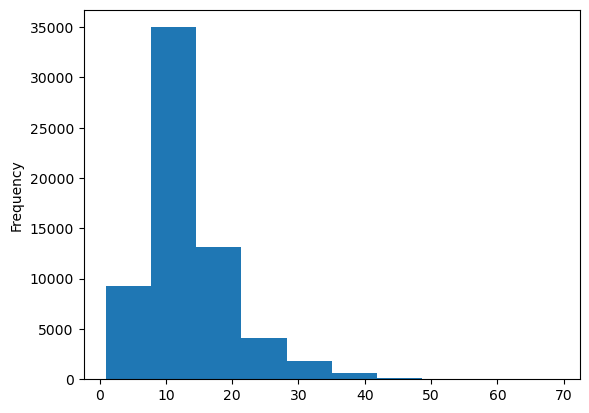

In [403]:
pd.Series([len(x) for x in sequences_tr]).plot.hist()

## padding der Sequenzen

In [404]:
padded_sequences_tr = tf.keras.preprocessing.sequence.pad_sequences(sequences_tr, padding='pre', maxlen=max_len)
padded_sequences_ts = tf.keras.preprocessing.sequence.pad_sequences(sequences_ts, padding='pre', maxlen=max_len)


In [405]:
len(padded_sequences_tr)

64228

In [406]:
len(padded_sequences_ts)

7137

In [407]:
padded_sequences_tr[10]


array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,   130,    42,  1542,
         338,   106,   189,   174,    67,   204,   325, 22037,   684,
        1008, 22038,   392,  9796,   517,  9797,   302])

In [408]:
for word in sequences_tr[0]:
    print(reverse_word_index[word])

amount
debt
issu
non
financi
corpor
europ
set
new
record
last
week
worldwid
debt
sale
surg
past
200
billion
past
week
economi
invest
financialservic
stock


In [409]:
#act_rec = 'tanh'
#act_dns = 'elu'
#act_output = 'softmax'
#lrning_rt = .0001
#dp_out = .45
#embedding_dim = 156

In [410]:
# how lon is the longest tweet
max_len

61

In [411]:
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 156

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_len),
    tf.keras.layers.SimpleRNN(103, activation='tanh'),
    #
    tf.keras.layers.Dense(76, activation='elu'),
    tf.keras.layers.Dropout(0.45),
    tf.keras.layers.Dense(52, activation='elu'),
    #
    tf.keras.layers.Dense(y_categorical.shape[1], activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['categorical_accuracy'])
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 61, 156)           6962280   
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 103)               26780     
                                                                 
 dense_18 (Dense)            (None, 76)                7904      
                                                                 
 dropout_6 (Dropout)         (None, 76)                0         
                                                                 
 dense_19 (Dense)            (None, 52)                4004      
                                                                 
 dense_20 (Dense)            (None, 3)                 159       
                                                                 
Total params: 7001127 (26.71 MB)
Trainable params: 700

In [412]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [413]:
model.save("simple_RNN.h5")

c:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


representation avec pydot


In [414]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [415]:
#from tensorflow.keras.utils import plot_model

#plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


In [416]:
history = model.fit(padded_sequences_tr, y_train, validation_split=0.2, epochs=20, batch_size=1028)


Epoch 1/20
50/50 [==============================] - 10s 180ms/step - loss: 1.0422 - categorical_accuracy: 0.4436 - val_loss: 0.9872 - val_categorical_accuracy: 0.4946
Epoch 2/20
50/50 [==============================] - 9s 174ms/step - loss: 0.9374 - categorical_accuracy: 0.5490 - val_loss: 0.8689 - val_categorical_accuracy: 0.6040
Epoch 3/20
50/50 [==============================] - 9s 176ms/step - loss: 0.7775 - categorical_accuracy: 0.6575 - val_loss: 0.7329 - val_categorical_accuracy: 0.6702
Epoch 4/20
50/50 [==============================] - 9s 174ms/step - loss: 0.6139 - categorical_accuracy: 0.7491 - val_loss: 0.6151 - val_categorical_accuracy: 0.7404
Epoch 5/20
50/50 [==============================] - 9s 174ms/step - loss: 0.4756 - categorical_accuracy: 0.8177 - val_loss: 0.5325 - val_categorical_accuracy: 0.7827
Epoch 6/20
50/50 [==============================] - 9s 177ms/step - loss: 0.3648 - categorical_accuracy: 0.8670 - val_loss: 0.4766 - val_categorical_accuracy: 0.8141
Epo

2008/2008 [==============================] - 9s 4ms/step - loss: 0.1579 - categorical_accuracy: 0.9614
Trainingsgenauigkeit: 0.961387574672699
224/224 [==============================] - 1s 5ms/step - loss: 0.6408 - categorical_accuracy: 0.8345
Testgenauigkeit: 0.8345243334770203


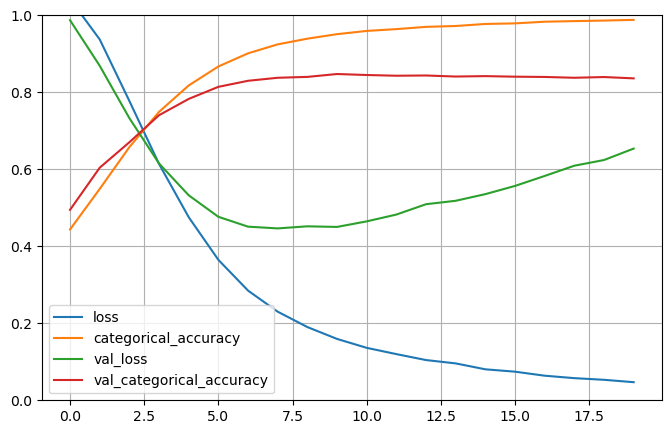

In [417]:
# Bewertung des Modells
(loss, accuracy) = model.evaluate(padded_sequences_tr, y_train)
print(f"Trainingsgenauigkeit: {accuracy}")
(loss, accuracy) = model.evaluate(padded_sequences_ts, y_test)
print(f"Testgenauigkeit: {accuracy}")

# Plotten des Trainingsverlaufs
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

224/224 [==============================] - 1s 5ms/step


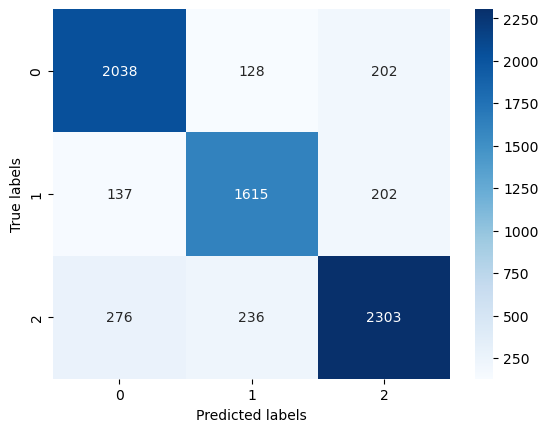

In [418]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Vorhersagen
y_pred = model.predict(padded_sequences_ts)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()